# Melbourne House Price Prediction

#### Performance Measure to be used: R2 Score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
path = r"C:\Users\User\OneDrive\Programming books\Datasets\melb_data.csv"
df_orig = pd.read_csv(path)
df = df_orig.copy()
df.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price
0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067,2,...,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,1480000
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/2/2016,2.5,3067,2,...,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,1035000
2,Abbotsford,5 Charles St,3,h,SP,Biggin,4/3/2017,2.5,3067,3,...,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,1465000
3,Abbotsford,40 Federation La,3,h,PI,Biggin,4/3/2017,2.5,3067,3,...,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,850000
4,Abbotsford,55a Park St,4,h,VB,Nelson,4/6/2016,2.5,3067,3,...,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,1600000


### Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Method         13580 non-null  object 
 5   SellerG        13580 non-null  object 
 6   Date           13580 non-null  object 
 7   Distance       13580 non-null  float64
 8   Postcode       13580 non-null  int64  
 9   Bedroom2       13580 non-null  int64  
 10  Bathroom       13580 non-null  int64  
 11  Car            13518 non-null  float64
 12  Landsize       13580 non-null  int64  
 13  BuildingArea   7130 non-null   float64
 14  YearBuilt      8205 non-null   float64
 15  CouncilArea    12211 non-null  object 
 16  Lattitude      13580 non-null  float64
 17  Longtitude     13580 non-null  float64
 18  Region

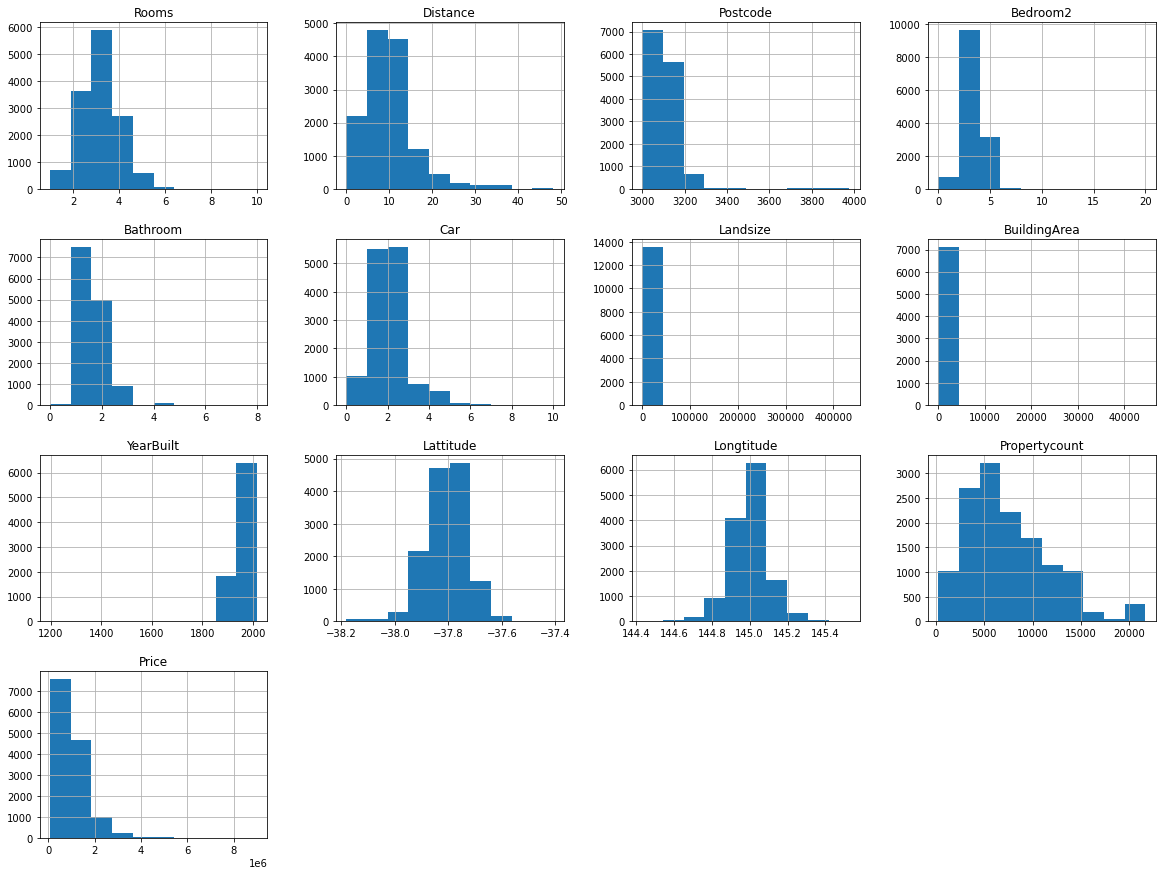

In [5]:
df.hist(figsize = (20, 15))
plt.show()

Text(0.5, 1.0, 'Map of Melbourne')

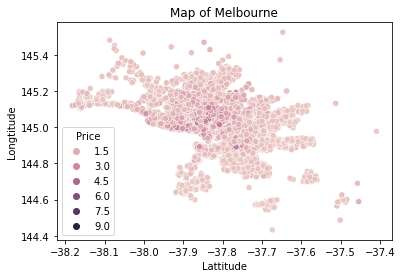

In [6]:
sns.scatterplot(x = df['Lattitude'], y = df['Longtitude'], hue = df['Price'])
plt.title('Map of Melbourne')

### Feature Engineering

Postcode, CouncilArea, Distance and Propertycount are all directly related to the Suburb column\
They will be removed

In [7]:
cols = ['Suburb', 'CouncilArea', 'Postcode', 'Distance', 'Propertycount']

In [8]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Regionname', 'Price'],
      dtype='object')

In [9]:
# Address column
'''import re
for i in range(len(df['Address'])):
    df['Address'].iloc[i] = re.sub(r'\d+', '', df['Address'].iloc[i])
    i = i + 1
df['Address']'''

"import re\nfor i in range(len(df['Address'])):\n    df['Address'].iloc[i] = re.sub(r'\\d+', '', df['Address'].iloc[i])\n    i = i + 1\ndf['Address']"

In [10]:
df.drop('Address', axis = 1, inplace = True)

In [11]:
df.drop('Date', axis = 1, inplace = True)

In [12]:
df['SellerG'].value_counts()

Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
                 ... 
Prowse              1
Luxe                1
Zahn                1
Homes               1
Point               1
Name: SellerG, Length: 268, dtype: int64

In [13]:
df['Method'].value_counts()

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64

In [14]:
df['Type'].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [15]:
df.drop('SellerG', axis = 1, inplace = True)

In [16]:
df.head(10)

,Rooms,Type,Method,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Price
0,2,h,S,2,1,1.0,202,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,1480000
1,2,h,S,2,1,0.0,156,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,1035000
2,3,h,SP,3,2,0.0,134,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,1465000
3,3,h,PI,3,2,1.0,94,NaN,NaN,-37.7969,144.9969,Northern Metropolitan,850000
4,4,h,VB,3,1,2.0,120,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,1600000
5,2,h,S,2,1,0.0,181,NaN,NaN,-37.8041,144.9953,Northern Metropolitan,941000
6,3,h,S,4,2,0.0,245,210.0,1910.0,-37.8024,144.9993,Northern Metropolitan,1876000
7,2,h,S,2,1,2.0,256,107.0,1890.0,-37.8060,144.9954,Northern Metropolitan,1636000
8,1,u,S,1,1,1.0,0,NaN,NaN,-37.8008,144.9973,Northern Metropolitan,300000
9,2,h,S,3,1,2.0,220,75.0,1900.0,-37.8010,144.9989,Northern Metropolitan,1097000


### Missing Values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         13580 non-null  int64  
 1   Type          13580 non-null  object 
 2   Method        13580 non-null  object 
 3   Bedroom2      13580 non-null  int64  
 4   Bathroom      13580 non-null  int64  
 5   Car           13518 non-null  float64
 6   Landsize      13580 non-null  int64  
 7   BuildingArea  7130 non-null   float64
 8   YearBuilt     8205 non-null   float64
 9   Lattitude     13580 non-null  float64
 10  Longtitude    13580 non-null  float64
 11  Regionname    13580 non-null  object 
 12  Price         13580 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 1.3+ MB


<AxesSubplot:>

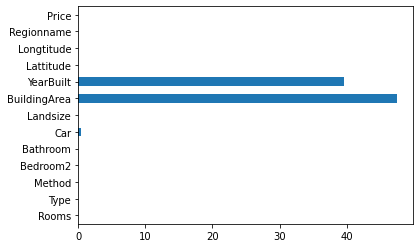

In [18]:
(df.isnull().sum() * 100/ len(df)).plot(kind = 'barh')

<AxesSubplot:>

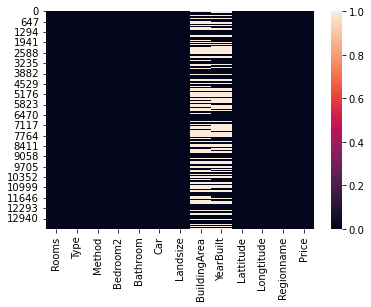

In [19]:
sns.heatmap(data = df.isnull())

Too many columns missing from BuildingArea and YearBuilt\
They'll be dropped

In [20]:
df.drop(['BuildingArea', 'YearBuilt'], axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rooms       13580 non-null  int64  
 1   Type        13580 non-null  object 
 2   Method      13580 non-null  object 
 3   Bedroom2    13580 non-null  int64  
 4   Bathroom    13580 non-null  int64  
 5   Car         13518 non-null  float64
 6   Landsize    13580 non-null  int64  
 7   Lattitude   13580 non-null  float64
 8   Longtitude  13580 non-null  float64
 9   Regionname  13580 non-null  object 
 10  Price       13580 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


In [22]:
df['Car'] = df['Car'].fillna(df['Car'].mode()[0])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rooms       13580 non-null  int64  
 1   Type        13580 non-null  object 
 2   Method      13580 non-null  object 
 3   Bedroom2    13580 non-null  int64  
 4   Bathroom    13580 non-null  int64  
 5   Car         13580 non-null  float64
 6   Landsize    13580 non-null  int64  
 7   Lattitude   13580 non-null  float64
 8   Longtitude  13580 non-null  float64
 9   Regionname  13580 non-null  object 
 10  Price       13580 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


### Handling Text and Categorical Attributes
One-hot encoding

In [24]:
cat_cols = ['Type', 'Method', 'Regionname']

In [25]:
df_onehot = pd.get_dummies(df[cat_cols])
df_onehot

,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
13576,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
13577,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
13578,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [26]:
df_new = df.copy()

In [27]:
df_new.drop(cat_cols, axis = 1, inplace = True)
df_new = df_new.join(df_onehot)
df_new.head()

,Rooms,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Price,Type_h,Type_t,...,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,2,1,1.0,202,-37.7996,144.9984,1480000,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2,2,1,0.0,156,-37.8079,144.9934,1035000,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3,3,2,0.0,134,-37.8093,144.9944,1465000,1,0,...,1,0,0,0,1,0,0,0,0,0
3,3,3,2,1.0,94,-37.7969,144.9969,850000,1,0,...,0,0,0,0,1,0,0,0,0,0
4,4,3,1,2.0,120,-37.8072,144.9941,1600000,1,0,...,0,1,0,0,1,0,0,0,0,0


In [28]:
df_new.columns

Index(['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude',
       'Longtitude', 'Price', 'Type_h', 'Type_t', 'Type_u', 'Method_PI',
       'Method_S', 'Method_SA', 'Method_SP', 'Method_VB',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object')

### Build a train_test_split function

In [29]:
def split_train_test(data, test_size):
    shuffled_indices = np.random.permutation(len(data))
    test_len = int(test_size * len(data))
    test = pd.DataFrame([data.iloc[i] for i in shuffled_indices[:test_len]])
    train = pd.DataFrame([data.iloc[j] for j in shuffled_indices[test_len:]])
    train = train.reset_index(drop = True)
    test = test.reset_index(drop = True)
    return train, test

In [30]:
train, test = split_train_test(df_new, 0.2)

In [31]:
test

,Rooms,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Price,Type_h,Type_t,...,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,3.0,3.0,1.0,1.0,617.0,-37.76830,144.83140,605000.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,2.0,1.0,1.0,169.0,-37.71607,145.07884,686000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,-37.79640,144.90270,357000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,2.0,1.0,2.0,313.0,-37.89800,145.07590,910500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,2.0,1.0,1.0,0.0,-37.91160,144.99780,850000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,3.0,3.0,1.0,1.0,557.0,-37.83780,144.86570,901000.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2712,3.0,3.0,1.0,1.0,588.0,-37.88246,145.10046,1080000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2713,3.0,3.0,1.0,1.0,430.0,-37.74962,145.04658,697500.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2714,3.0,3.0,1.0,2.0,477.0,-37.82570,145.05140,1890000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
train

,Rooms,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Price,Type_h,Type_t,...,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,3.0,3.0,2.0,1.0,125.0,-37.85257,145.00296,1390000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,3.0,2.0,2.0,517.0,-37.89400,144.99770,2575000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,3.0,3.0,2.0,309.0,-37.74570,144.89120,983000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,3.0,1.0,1.0,277.0,-37.75920,144.97321,905000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3.0,2.0,2.0,251.0,-37.73580,145.05590,600000.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,3.0,3.0,2.0,2.0,132.0,-37.84890,145.08800,930000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10860,3.0,3.0,2.0,1.0,293.0,-37.74810,144.96630,1120000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10861,3.0,2.0,1.0,1.0,374.0,-37.80570,144.88820,1200000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10862,3.0,3.0,1.0,3.0,406.0,-37.72484,144.74296,600000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Split into X and Y

In [33]:
X_train = train.drop('Price', axis = 1)
X_test = test.drop('Price', axis = 1)

y_train = train['Price']
y_test = test['Price']

In [34]:
X_train.head()

,Rooms,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Type_h,Type_t,Type_u,...,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,3.0,3.0,2.0,1.0,125.0,-37.85257,145.00296,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,3.0,2.0,2.0,517.0,-37.89400,144.99770,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,3.0,3.0,2.0,309.0,-37.74570,144.89120,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,3.0,1.0,1.0,277.0,-37.75920,144.97321,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3.0,2.0,2.0,251.0,-37.73580,145.05590,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
y_test

0        605000.0
1        686000.0
2        357000.0
3        910500.0
4        850000.0
          ...    
2711     901000.0
2712    1080000.0
2713     697500.0
2714    1890000.0
2715     793000.0
Name: Price, Length: 2716, dtype: float64

### Feature Scaling

In [36]:
cols_scale = ['Landsize', 'Lattitude', 'Longtitude']

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
scaler.fit(X_train[cols_scale])
X_train[cols_scale] = scaler.transform(X_train[cols_scale])
X_test[cols_scale] = scaler.transform(X_test[cols_scale])

In [39]:
X_train

,Rooms,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Type_h,Type_t,Type_u,...,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,3.0,3.0,2.0,1.0,0.000289,0.426320,0.521817,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,3.0,2.0,2.0,0.001194,0.372794,0.517012,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,3.0,3.0,2.0,0.000714,0.564391,0.419711,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,3.0,1.0,1.0,0.000640,0.546950,0.494637,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3.0,2.0,2.0,0.000580,0.577181,0.570185,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,3.0,3.0,2.0,2.0,0.000305,0.431061,0.599512,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10860,3.0,3.0,2.0,1.0,0.000677,0.561290,0.488324,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10861,3.0,2.0,1.0,1.0,0.000864,0.486874,0.416970,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10862,3.0,3.0,1.0,3.0,0.000938,0.591341,0.284275,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Modelling

##### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [42]:
lr_model = lr.fit(X_train, y_train)

In [43]:
y_lr = lr_model.predict(X_test)

In [61]:
lr_model.score(X_test, y_test)

0.454794601948161

In [44]:
y_lr[678]

1278656.0

In [45]:
y_test[678]

1205000.0

##### DecisionTreeRegressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dtr = DecisionTreeRegressor()
dtr_model = dtr.fit(X_train, y_train)
y_dtr = dtr.predict(X_test)

In [48]:
dtr_model.score(X_test, y_test)

0.5905021581245873

In [49]:
y_test[758]

892000.0

In [50]:
y_dtr[758]

1015000.0

##### RandomForestRegressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rfr = RandomForestRegressor()
rfr_model = rfr.fit(X_train, y_train)
y_rfr = rfr.predict(X_test)

In [53]:
rfr_model.score(X_test, y_test)

0.7446025904757982

In [54]:
y_test[78]

855000.0

In [55]:
y_rfr[78]

705450.0

##### XGBoost Regressor

In [64]:
import xgboost as xgb

In [65]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train, y_train)
y_xgb = xg_reg.predict(X_test)

In [66]:
xg_reg.score(X_test, y_test)

0.7480685338045034

In [67]:
from sklearn.metrics import r2_score

In [68]:
r2_score(y_test, y_xgb)

0.7480685338045034

### Grid Search

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70], 
              'max_features': [2, 4, 6, 8, 10, 12, 14, 16]}

rfr_grid = RandomForestRegressor()
grid_search = GridSearchCV(rfr_grid, param_grid, cv = 5,
scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8, 10, 12, 14, 16],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70]},
             scoring='neg_mean_squared_error')

In [57]:
grid_search.best_estimator_

RandomForestRegressor(max_features=10, n_estimators=70)

In [58]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 70}

##### RandomForestRegressor

In [62]:
rfr_new = RandomForestRegressor(max_features=10, n_estimators=70)
rfr_new.fit(X_train, y_train)
y_hat = rfr_new.predict(X_test)

In [63]:
rfr_new.score(X_test, y_test)

0.7346125832875553